# Mapa Térmico de Densidade de Energia por km²

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unidecode

In [2]:
estado_sp = gpd.read_file(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\SP_Municipios_2022.shp")
enel_sp = gpd.read_file("SP_BDGD_ENEL.shp") #conj no bdgd
ponnot = gpd.read_file(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\PONNOT.shp", low_memory=False)

ucat = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UCAT_tab.csv")
ucmt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UCMT_tab.csv")
ucbt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UCBT_tab.csv", low_memory=False)

ugat = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UGAT_tab.csv", sep=",")
ugmt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UGMT_tab.csv", sep=";")
ugbt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UGBT_tab.csv", sep=";")

sub = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\SUB.csv", sep=";")
pt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\PT.csv", sep=",")
pnt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\PNT.csv", sep=",")

In [3]:
enel_sp

,OBJECTID,COD_ID,DIST,NOME,SIST_INTE,SIST_SUBT,DESCR,Shape_Leng,Shape_Area,geometry
0,1.0,15829,390,MIGUEL PAULISTA,1,0,None,0.286406,0.001745,"POLYGON ((-46.40804 -23.47016, -46.40562 -23.4..."
1,2.0,16574,390,CAMBUCI,1,0,None,0.115581,0.000309,"POLYGON ((-46.62588 -23.55176, -46.62607 -23.5..."
2,3.0,15836,390,GATO PRETO,1,0,None,0.415801,0.004991,"POLYGON ((-46.76229 -23.38606, -46.76178 -23.3..."
3,4.0,13000,390,VITORIA,1,0,None,0.272793,0.001707,"POLYGON ((-46.53622 -23.67431, -46.53560 -23.6..."
4,5.0,12966,390,RIBEIRAO PIRES,1,0,None,0.946122,0.020180,"POLYGON ((-46.41790 -23.66137, -46.41736 -23.6..."
...,...,...,...,...,...,...,...,...,...,...
138,139.0,16601,390,PARQUE DOS LAGOS,1,0,None,0.090405,0.000520,"POLYGON ((-46.64731 -23.74201, -46.65790 -23.7..."
139,140.0,16604,390,VILA MARIANA,1,0,None,0.121409,0.000300,"POLYGON ((-46.64268 -23.57349, -46.64139 -23.5..."
140,141.0,16596,390,AUGUSTA,1,0,None,0.043583,0.000058,"POLYGON ((-46.65112 -23.55770, -46.65308 -23.5..."
141,142.0,16603,390,ROSELANDIA,1,0,None,0.270876,0.001579,"POLYGON ((-46.91570 -23.59842, -46.91579 -23.5..."


In [4]:
ene_conj = []
for conjunto in enel_sp.COD_ID:
    ene_conj.append(ucbt[ucbt.CONJ == int(conjunto)]["ENE_01"].sum() + ucmt[ucmt.CONJ == int(conjunto)]["ENE_01"].sum() + ucat[ucat.CONJ == int(conjunto)]["ENE_P_01"].sum() + ucat[ucat.CONJ == int(conjunto)]["ENE_F_01"].sum())

enel_sp["ENE_TOTAL_01"] = ene_conj
enel_sp["DENSIDADE_LOAD"] = enel_sp["ENE_TOTAL_01"]/enel_sp["Shape_Area"]

In [5]:
enel_sp = enel_sp[enel_sp["ENE_TOTAL_01"] != 0]

In [6]:
ger_conj = []
for conjunto in enel_sp.COD_ID:
    ger_conj.append(ugbt[ugbt.CONJ == int(conjunto)]["ENE_01"].sum() + ugmt[ugmt.CONJ == int(conjunto)]["ENE_01"].sum() + ugat[ugat.CONJ == int(conjunto)]["ENE_P_01"].sum() + ugat[ugat.CONJ == int(conjunto)]["ENE_F_01"].sum())

enel_sp["GER_TOTAL_01"] = ger_conj
enel_sp["DENSIDADE_GERACAO"] = enel_sp["GER_TOTAL_01"]/enel_sp["Shape_Area"]

conj_geracao = enel_sp[enel_sp["GER_TOTAL_01"] != 0]

<AxesSubplot: >

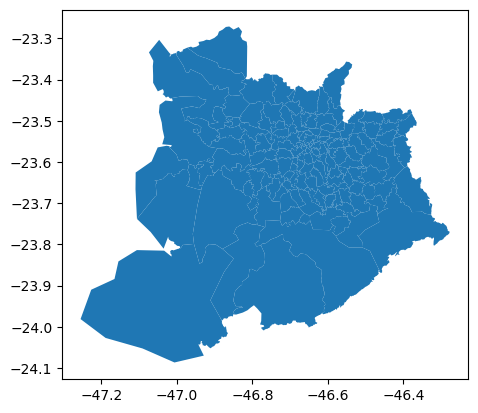

In [7]:
enel_sp.plot()

In [8]:
ene_municipio = []


for municipio in estado_sp.CD_MUN:
    ene_municipio.append(ucbt[ucbt.MUN == int(municipio)]["ENE_01"].sum() + ucmt[ucmt.MUN == int(municipio)]["ENE_01"].sum() + ucat[ucat.MUN == int(municipio)]["ENE_P_01"].sum()+ucat[ucat.MUN == int(municipio)]["ENE_F_01"].sum())

estado_sp["ENE_TOTAL_01"] = ene_municipio 

estado_sp["DENSIDADE_LOAD"] = estado_sp["ENE_TOTAL_01"]/estado_sp["AREA_KM2"]
estado_sp = estado_sp[estado_sp["ENE_TOTAL_01"] != 0]

In [9]:
ger_municipio = []
for municipio in estado_sp.CD_MUN:
    ger_municipio.append(ugbt[ugbt.MUN == int(municipio)]["ENE_01"].sum() + ugmt[ugmt.MUN == int(municipio)]["ENE_01"].sum() + ugat[ugat.MUN == int(municipio)]["ENE_P_01"].sum()+ugat[ugat.MUN == int(municipio)]["ENE_F_01"].sum())

estado_sp["GER_TOTAL_01"] = ger_municipio

estado_sp["DENSIDADE_GERACAO"] = estado_sp["GER_TOTAL_01"]/estado_sp["AREA_KM2"]   
mapa_geracao = estado_sp[estado_sp["GER_TOTAL_01"] != 0 ]

In [10]:
ugat.columns

Index(['OBJECTID', 'PN_CON', 'DIST', 'PAC', 'CTAT', 'CEG_GD', 'CONJ', 'MUN',
       'SUB', 'BRR', 'CEP', 'CNAE', 'FAS_CON', 'GRU_TEN', 'TEN_CON',
       'SIT_ATIV', 'DAT_CON', 'POT_INST', 'DEM_CONT', 'DEM_P_01', 'DEM_P_02',
       'DEM_P_03', 'DEM_P_04', 'DEM_P_05', 'DEM_P_06', 'DEM_P_07', 'DEM_P_08',
       'DEM_P_09', 'DEM_P_10', 'DEM_P_11', 'DEM_P_12', 'DEM_F_01', 'DEM_F_02',
       'DEM_F_03', 'DEM_F_04', 'DEM_F_05', 'DEM_F_06', 'DEM_F_07', 'DEM_F_08',
       'DEM_F_09', 'DEM_F_10', 'DEM_F_11', 'DEM_F_12', 'ENE_P_01', 'ENE_P_02',
       'ENE_P_03', 'ENE_P_04', 'ENE_P_05', 'ENE_P_06', 'ENE_P_07', 'ENE_P_08',
       'ENE_P_09', 'ENE_P_10', 'ENE_P_11', 'ENE_P_12', 'ENE_F_01', 'ENE_F_02',
       'ENE_F_03', 'ENE_F_04', 'ENE_F_05', 'ENE_F_06', 'ENE_F_07', 'ENE_F_08',
       'ENE_F_09', 'ENE_F_10', 'ENE_F_11', 'ENE_F_12', 'DIC_01', 'DIC_02',
       'DIC_03', 'DIC_04', 'DIC_05', 'DIC_06', 'DIC_07', 'DIC_08', 'DIC_09',
       'DIC_10', 'DIC_11', 'DIC_12', 'FIC_01', 'FIC_02', 'FIC_03', 'FIC

In [11]:
len(estado_sp)

38

<AxesSubplot: >

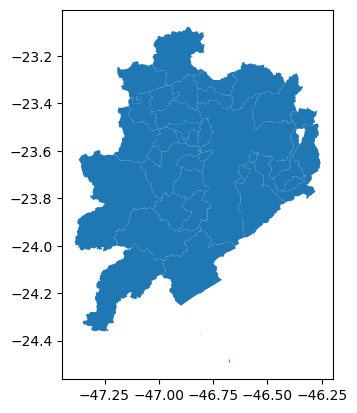

In [12]:
estado_sp.plot()

<AxesSubplot: >

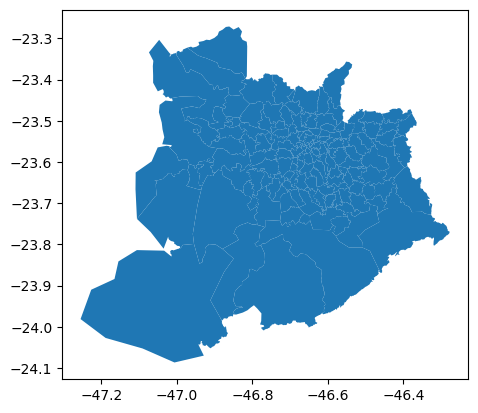

In [13]:
enel_sp.plot()

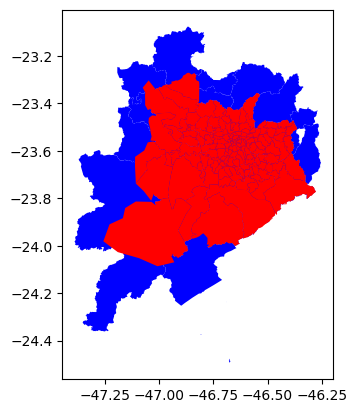

In [14]:
fig, ax = plt.subplots(1, 1)

estado_sp.plot(ax=ax, color='blue')  
enel_sp.plot(ax=ax, color='red')  

plt.show()


<AxesSubplot: >

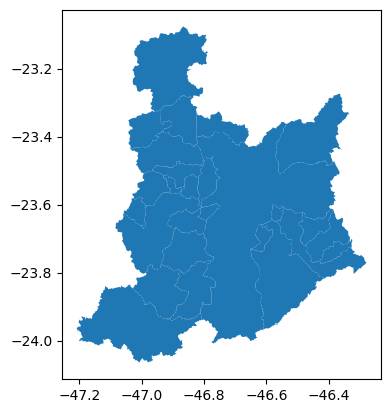

In [15]:
mapa_geracao.plot()

<AxesSubplot: >

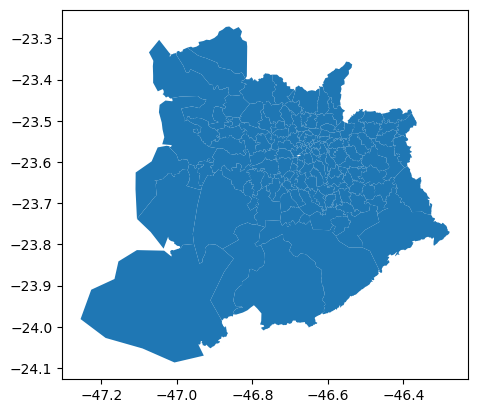

In [16]:
conj_geracao.plot()

<AxesSubplot: >

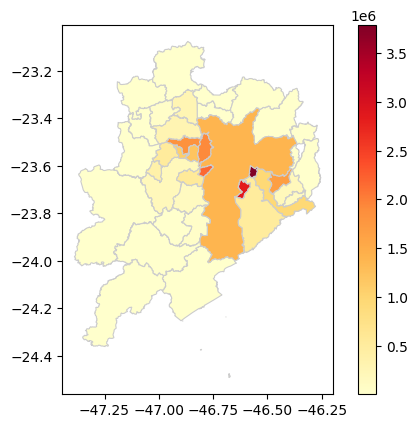

In [17]:
fig, ax = plt.subplots(1, 1)
estado_sp.plot(column="DENSIDADE_LOAD", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

<AxesSubplot: >

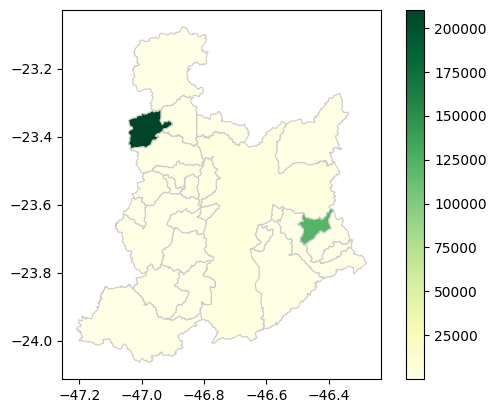

In [18]:
fig, ax = plt.subplots(1, 1)
mapa_geracao.plot(column="DENSIDADE_GERACAO", cmap="YlGn", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

<AxesSubplot: >

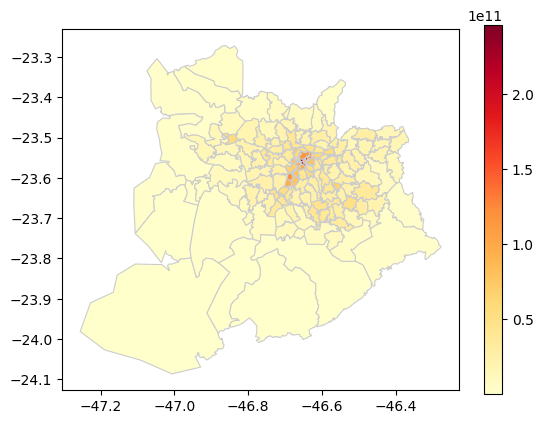

In [19]:
fig, ax = plt.subplots(1, 1)
enel_sp.plot(column="DENSIDADE_LOAD", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

<AxesSubplot: >

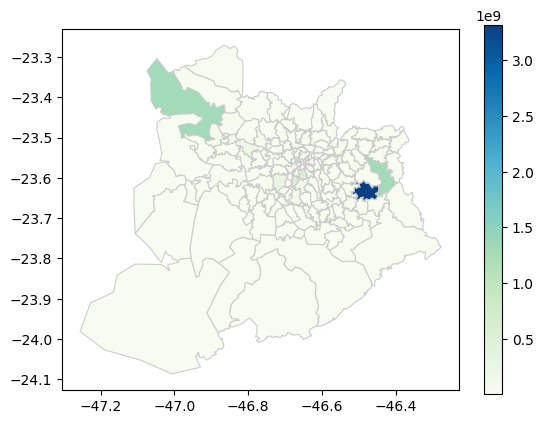

In [21]:
fig, ax = plt.subplots(1, 1)
conj_geracao.plot(column="DENSIDADE_GERACAO", cmap="GnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)